In [123]:
import pandas as pd 

npf=pd.read_csv('npf_train (1).csv')
npf.head()

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-01-01,nonevent,False,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2,2000-01-20,nonevent,False,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,3,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,5,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210


In [124]:
npf.columns

Index(['id', 'date', 'class4', 'partlybad', 'CO2168.mean', 'CO2168.std',
       'CO2336.mean', 'CO2336.std', 'CO242.mean', 'CO242.std',
       ...
       'T672.mean', 'T672.std', 'T84.mean', 'T84.std', 'UV_A.mean', 'UV_A.std',
       'UV_B.mean', 'UV_B.std', 'CS.mean', 'CS.std'],
      dtype='object', length=104)

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#visualization
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:150% !important;height:150% !important;}</style>"
HTML(style)

In [126]:
# npf_X=npf.drop(columns=['class4','id'])
npf_X=npf.drop(columns=['id','date'])
npf_X.head()

,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,nonevent,False,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,nonevent,False,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210


In [127]:
npf_X.shape

(458, 102)

In [128]:
npf_Y=npf_X.class4
npf_X=npf_X.drop(columns=['class4'])

In [129]:
for i in range(len(npf_Y.values)):
    if npf_Y[i]=='nonevent':
        npf_Y[i]=0
    else:
        npf_Y[i]=1
print(npf_Y)

0      0
1      0
2      0
3      0
4      1
      ..
453    0
454    0
455    0
456    0
457    0
Name: class4, Length: 458, dtype: object


In [130]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
npf_X = shuffle(npf_X)

x, x_test, y, y_test = train_test_split(npf_X,npf_Y, test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [131]:
y = pd.DataFrame(y)
y.head()
y.value_counts()
y=y.astype('int')

In [132]:
# clf=tree.DecisionTreeClassifier(criterion='entropy')
# clf
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=None)
clf

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

In [139]:
# clf.fit(x, y)
clf.fit(x, y)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

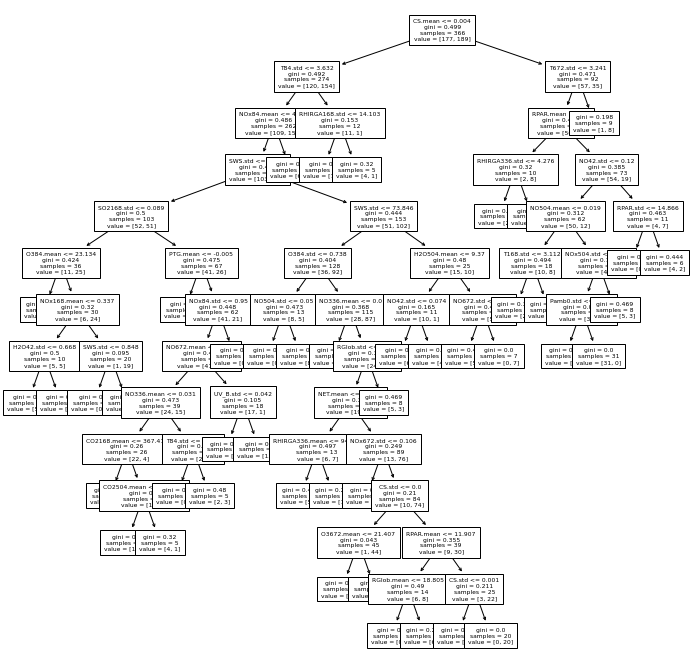

In [140]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=x.columns, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [151]:
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)
# accuracy = accuracy_score(y_test, y_pred)
# print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [148]:
clf.score(x,y)

0.8961748633879781

In [105]:
result=clf.predict(x_test)
result = pd.DataFrame(result)
result.value_counts()
type(result)

pandas.core.frame.DataFrame

In [92]:
y_test

432    0
378    0
384    0
52     1
440    1
      ..
44     1
251    1
167    1
290    1
404    0
Name: class4, Length: 92, dtype: object

In [108]:
y_test=pd.DataFrame(y_test)

In [112]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, result))

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [53]:
test_data=pd.read_csv('npf_test_hidden.csv')
test_data=test_data.drop(columns=['class4', 'date','id'])
test_data

,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,False,376.610169,0.526617,376.660339,0.500203,376.934655,0.564360,376.634746,0.471236,37.115592,...,-2.851967,0.156421,-2.356066,0.174219,2.374336,1.318965,0.040709,0.024647,0.000644,0.000119
1,False,390.624932,0.453585,390.580694,0.455308,391.000685,0.505836,390.487945,0.481292,69.134531,...,-18.646384,0.448865,-18.030984,0.478829,3.850439,2.056031,0.103446,0.060432,0.003707,0.000115
2,False,375.280258,1.249087,375.479806,1.241525,375.624129,1.423506,375.571474,1.200556,276.485371,...,3.485822,1.526998,4.649689,1.978654,15.498463,11.001410,0.557332,0.494026,0.001637,0.000428
3,False,382.642176,3.222805,382.890412,3.026140,383.136941,3.466259,382.937706,2.837540,308.904304,...,6.933127,3.737176,7.657725,3.823123,16.909366,13.924594,0.646806,0.602040,0.002480,0.000510
4,False,381.492971,4.386929,381.608000,4.333558,382.177784,4.491875,381.588857,4.263299,111.456879,...,11.941411,2.195680,12.570801,2.458619,7.596930,6.722838,0.275559,0.312076,0.009429,0.004438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,False,387.945654,8.594281,387.195208,6.395089,390.564398,12.503105,386.868542,5.561891,225.755653,...,13.846229,1.908796,14.671475,2.278146,14.888953,13.891135,0.724499,0.741484,0.002978,0.000775
961,False,381.204386,0.172730,381.193333,0.174513,381.289123,0.174594,381.174737,0.179355,12.633440,...,-5.539621,0.189930,-5.018333,0.192347,1.208696,0.588515,0.022685,0.011805,0.002506,0.000101
962,False,383.915986,2.407693,383.944965,2.349077,384.052183,2.456562,383.862958,2.212343,312.786155,...,6.970141,2.270736,7.698230,2.916700,16.280512,10.828638,0.572551,0.464658,0.006474,0.000857
963,False,379.521641,1.199564,379.525194,1.147027,379.778906,1.257693,379.473203,1.078942,315.506008,...,1.643628,2.549993,2.697919,2.916053,15.014020,8.972121,0.546366,0.416863,0.000829,0.000227


In [61]:
result=clf.predict(test_data)
result

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [28]:
import pandas as pd
import seaborn as sns
df =pd.read_csv('npf_train (1).csv',index_col='id')
#filter data first, then save theminto a new csv for easier acces later

class2 = df['class4'].copy()
class2[class2 != 'nonevent'] = 'event'
df['class2'] = class2

df.drop(['date', 'partlybad'], axis=1, inplace=True)

In [29]:
df['class4'], mapping_class4 = df['class4'].astype('category').factorize()
df['class2'], mapping_class2 = df['class2'].astype('category').factorize()

In [32]:
npf=df
npf

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
id,,,,,,,,,,,,,,,,,,,,,
1,0,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,19.245511,...,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733,0
2,0,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,31.107659,...,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572,0
3,0,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,...,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048,0
4,0,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,...,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751,0
5,1,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,...,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,5.398886,270.743458,...,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253,0
455,0,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,0
456,0,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,11.457833,108.311442,...,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391,0


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:

X = df.drop(['class4'], axis=1)
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

y_class4 = df['class4']

In [13]:
classifiers = [
    ('decissionTree', DecisionTreeClassifier(max_depth=5)),
    ('rfc', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))]

In [15]:
# clf=tree.DecisionTreeClassifier(criterion='entropy')
# clf
clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=None)
clf

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

In [16]:
clf.fit(X, y_class4)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

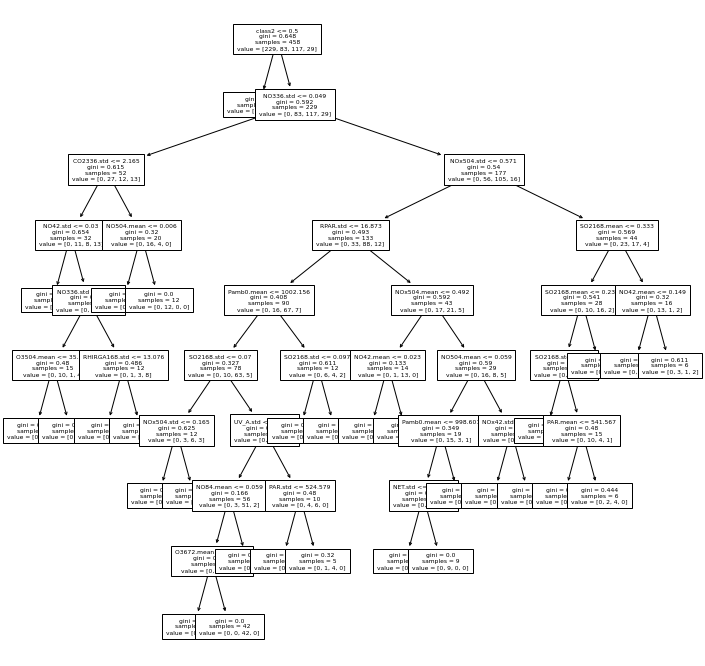

In [20]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=X.columns, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)

# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred,labels=None, sample_weight=None, normalize=None)
accuracy = accuracy_score(y_class4, y_pred)
accuracy
# print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

0.9126637554585153

In [26]:
from sklearn.model_selection import RandomizedSearchCV
clf=DecisionTreeClassifier()
parametres={'criterion': ['entropy'],
             'max_depth': range(1, 10),
           'min_samples_split': range(2,10),
           'min_samples_leaf': range(1,10)}
search=RandomizedSearchCV(clf, parametres)
search.fit(X, y_class4)
best_tree=search.best_estimator_

In [27]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=3)

In [33]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
npf = shuffle(npf)

X = npf.drop(['class4'], axis=1)
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

y_class4 = npf['class4']

x, x_test, y, y_test = train_test_split(X,y_class4, test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [34]:
clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=None)
clf

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

In [35]:
clf.fit(x, y)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

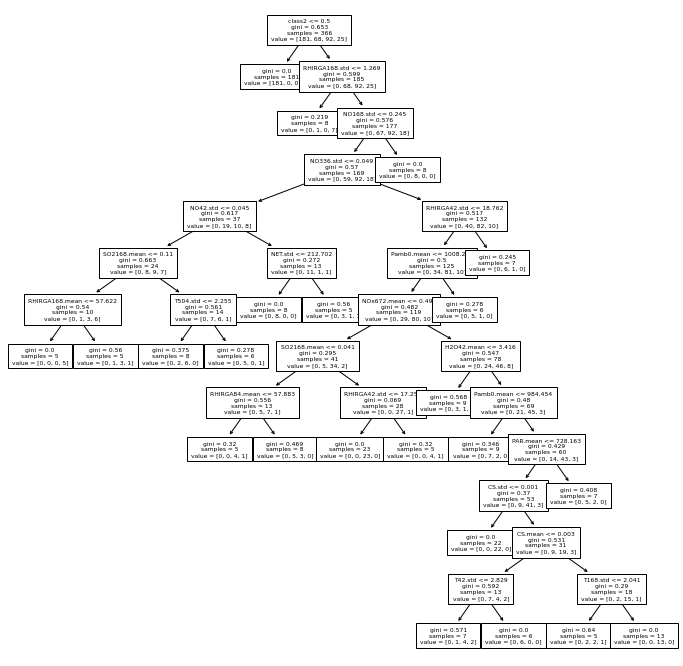

In [36]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=X.columns, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [37]:
y_pred = clf.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.717391304347826

In [45]:
from sklearn.model_selection import RandomizedSearchCV
clf=DecisionTreeClassifier()
parametres={'criterion': ['entropy', 'gini'],
             'max_depth': range(1, 10),
           'min_samples_split': range(2,10),
           'min_samples_leaf': range(1,10)}
search=RandomizedSearchCV(clf, parametres)
search.fit(X, y_class4)
best_tree=search.best_estimator_

In [46]:
best_tree

DecisionTreeClassifier(max_depth=2, min_samples_leaf=7)

In [41]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9,min_samples_split=5)
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9,
                       min_samples_split=5)

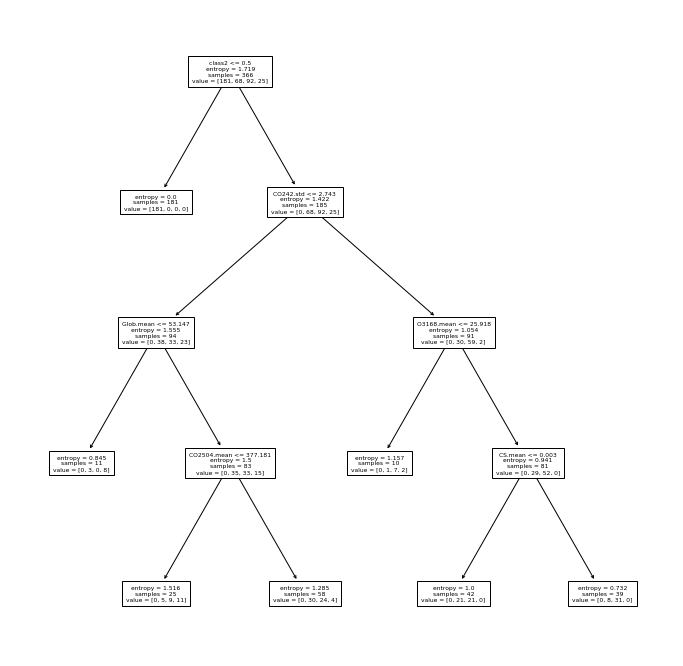

In [42]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=X.columns, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [43]:
y_pred = clf.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6739130434782609

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y_class4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.69565217 0.7173913  0.67391304 0.73626374 0.72527473]
Average score: 0.71
